In [1]:
import numpy as np
import sklearn
import matplotlib
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt 

In [2]:
from sklearn import linear_model as lm

In [3]:
for i in range(1,59):
    A = pd.read_csv('../../data/basis_vecs_scaled_color_{}.csv'.format(i))
    A = np.array(A)
    A = np.delete(A, 0, axis=1)
    A_8 = A[:,0:8]
    A_8_df = pd.DataFrame(A_8)
    A_8_df.to_csv('../../data/8_basis_vecs_scaled_color_{}.csv'.format(i))

In [4]:
A = pd.read_csv('../../data/basis_vecs_scaled.csv')
ratings= pd.read_csv('../../data/uw_58_ratings_matrix.csv')
c_means = pd.read_csv('../../data/col_means.csv')

In [5]:
A = np.array(A)
A = np.delete(A, 0, axis=1)
A_8 = A[:,0:8]

In [6]:
A_8_df = pd.DataFrame(A_8)

In [7]:
A_8_df.to_csv('../../data/8_basis_vecs_scaled.csv')

In [136]:
len(color_inds)

14

In [8]:
concept_ratings = ratings.iloc[22][1:59]
concept_ratings = np.array(concept_ratings)
concept_ratings = concept_ratings-c_means.V1.values

In [9]:

##high low col inds

#color_inds = [4, 22, 23, 26, 29, 32, 53, 56]#CVXOPT 
#color_inds = [3, 4, 8, 22, 23, 24, 26, 53] #SCS
color_inds=[0, 2, 3, 13, 22, 23, 26, 27, 32, 36, 49, 53, 55, 57] ## * best
#color_inds=[0, 2, 3, 13, 22, 23, 32, 49, 53, 55, 57] ##

#color_inds = [1,  7,  8, 12, 14, 19, 27, 28, 31, 33, 38, 46, 53] ## from R top and bottom
#color_inds = [1,  2,  8, 12, 14, 19, 26, 27, 28, 33, 35, 36, 38, 39, 55] ##top 2
#color_inds = [x - 1 for x in color_inds]


In [71]:
A_8[color_inds,:].shape

IndexError: index 57 is out of bounds for axis 0 with size 57

In [10]:
reg = lm.LinearRegression().fit(A_8[color_inds,:], concept_ratings[color_inds])


In [11]:
coords = reg.coef_
coords

array([ 1.05721624,  0.02064908, -2.28111874,  0.67065445, -0.25435828,
       -1.04135828,  0.2270893 , -0.12126337])

In [12]:
predicted_ratings = np.matmul(A_8,coords)+c_means.V1.values


In [13]:
tru_ratings = np.array(concept_ratings+c_means.V1.values, dtype = 'float')


In [14]:
np.corrcoef(predicted_ratings,tru_ratings)

array([[1.        , 0.98107695],
       [0.98107695, 1.        ]])

In [15]:
#np.matmul(A_8,np.matmul(concept_ratings[color_inds],A_8[color_inds,:]))+c_means.V1.values

In [16]:
np.corrcoef(np.matmul(A_8,coords).astype(float),concept_ratings.astype(float))

array([[1.        , 0.97424084],
       [0.97424084, 1.        ]])

In [17]:
conc_prof_mat = np.zeros(shape=(30,8))

cors = []
L2s = []
for i in range(ratings.shape[0]):
    concept_ratings = ratings.iloc[i][1:59]
    concept_ratings = np.array(concept_ratings)
    concept_ratings = concept_ratings-c_means.V1.values
    reg = lm.LinearRegression().fit(A_8[color_inds,:], concept_ratings[color_inds])
    #reg = lm.LinearRegression().fit(A_8, concept_ratings)
    coords = reg.coef_[0:8]
    recon = np.matmul(A_8,coords)
    cors.append(np.corrcoef(recon.astype(float),concept_ratings.astype(float))[0,1])
    L2s.append(np.linalg.norm(recon-concept_ratings))
    conc_prof_mat[i,:] = coords
               

In [74]:
ratings.iloc[:,0].values

array(['dress', 'pants', 'shirt', 'shoes', 'socks', 'above', 'below',
       'beside', 'far', 'near', 'angry', 'disgust', 'fearful', 'happy',
       'sad', 'blueberry', 'lemon', 'mango', 'strawberry', 'watermelon',
       'beach', 'field', 'ocean', 'sky', 'sunset', 'dawn', 'day', 'dusk',
       'night', 'noon'], dtype=object)

In [18]:
pd.DataFrame(list(zip(list(ratings.iloc[:,0]),cors)), columns = ['concept','correlation'])

,concept,correlation
0,dress,0.769448
1,pants,0.930343
2,shirt,0.920607
3,shoes,0.953365
4,socks,0.944001
5,above,0.876223
6,below,0.871086
7,beside,0.694140
8,far,0.849848
9,near,0.879062


In [19]:
np.mean(cors)

0.9043318379279122

In [20]:
#plt.scatter(recon,concept_ratings)

In [21]:
# cors = []
# L2s = []
# for i in range(ratings.shape[0]-1):
#     concept_ratings = ratings.iloc[i][1:59]
#     concept_ratings = np.array(concept_ratings)
   
#     recon = np.matmul(A_8, np.matmul(concept_ratings[color_inds],A_8[color_inds,:]))
#     #recon = np.matmul(A_8, np.matmul(concept_ratings,A_8))
    
    
#     cors.append(np.corrcoef(recon.astype(float),concept_ratings.astype(float))[0,1])
#     L2s.append(np.linalg.norm(recon-concept_ratings))
               

In [22]:
#pd.DataFrame(list(zip(list(ratings.iloc[:,0]),cors,L2s)), columns = ['concept','correlation','L2_norm'])

In [23]:
#np.mean(cors)

In [24]:
#recon+c_means.V1.values

In [25]:
#concept_ratings

In [26]:
concept_list = ratings.iloc[:,0].values

In [27]:
cors= []
for this_concept in concept_list:
    ratings_sub = ratings[~ratings.iloc[:,0].isin([this_concept])]
    A = pd.read_csv('../../data/basis_vecs_scaled_{}.csv'.format(this_concept))
    A = np.array(A)
    A = np.delete(A, 0, axis=1)
    A_8 = A[:,0:8]
    concept_ratings = np.array(ratings[ratings.iloc[:,0].isin([this_concept])].iloc[:,1:59])-c_means.V1.values
    reg = lm.LinearRegression().fit(A_8[color_inds,:], concept_ratings.squeeze(0)[color_inds])
    #reg = lm.LinearRegression().fit(A_8, concept_ratings.squeeze(0))
    coords = reg.coef_[0:8]
    recon = np.matmul(A_8,coords)
    cors.append(np.corrcoef(recon.astype(float),concept_ratings.squeeze(0).astype(float))[0,1])

    

(57, 8)

In [28]:
pd.DataFrame(list(zip(list(ratings.iloc[:,0]),cors)), columns = ['concept','correlation'])

,concept,correlation
0,dress,0.618438
1,pants,0.899356
2,shirt,0.867638
3,shoes,0.927324
4,socks,0.915416
5,above,0.833670
6,below,0.749995
7,beside,0.328347
8,far,0.574342
9,near,0.750625


In [29]:
np.mean(cors)

0.8202934188673098

In [30]:
prof_coef_mat = pd.read_csv('../../data/8_regression_weights.csv', header=None).to_numpy()
color_coord_mat = pd.read_csv('../../data/uw58_regressor_vals.csv',header=None).to_numpy()

In [31]:
color_coord_mat.shape

(7, 58)

In [32]:
recon = np.matmul(conc_prof_mat,np.matmul(prof_coef_mat.T,color_coord_mat)).T


In [33]:
recon = recon+c_means.V1.values.reshape(58,1)
recon = recon.T

In [34]:
recon.shape

(30, 58)

In [35]:
ratings_np = ratings.iloc[:,1:59].to_numpy()
ratings_np.shape

(30, 58)

In [36]:
np.corrcoef(recon[0,],ratings_np[0,])

array([[1.       , 0.7141342],
       [0.7141342, 1.       ]])

In [37]:
recon_cors = []
for i in range(30):
    recon_cors.append(np.corrcoef(recon[i,], ratings_np[i,])[0,1])

In [75]:
concept_holdout = pd.DataFrame(list(zip(list(ratings.iloc[:,0]),recon_cors)), columns = ['concept','correlation'])

In [82]:
concept_holdout

,concept,correlation
0,dress,0.714134
1,pants,0.839920
2,shirt,0.843371
3,shoes,0.768213
4,socks,0.807631
5,above,0.798357
6,below,0.674302
7,beside,0.456287
8,far,0.614848
9,near,0.746858


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


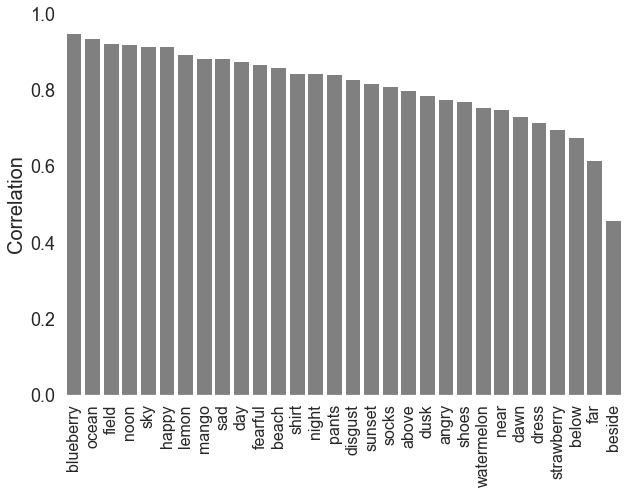

In [135]:
concept_holdout =concept_holdout.sort_values(['correlation'],ascending=False).reset_index(drop=True)
fig = plt.figure(figsize=(10,7))
sns.barplot(concept_holdout.concept, concept_holdout.correlation, edgecolor = 'none', color='gray')
#plt.axis('off')
#plt.xticks([])
plt.xticks(rotation = 90, fontsize= 16)
plt.xlabel('')
plt.yticks(fontsize=18)
plt.ylabel('Correlation', fontsize=20)
plt.ylim(0,1)
ax = plt.gca()
#ax.set_facecolor((0.3497,0.3497,0.3497))
ax.set_facecolor((1,1,1))

plt.savefig('concept_holdout.pdf',format ='pdf',bbox_inches='tight')
plt.show()


In [39]:
np.mean(recon_cors)

0.809656018851346

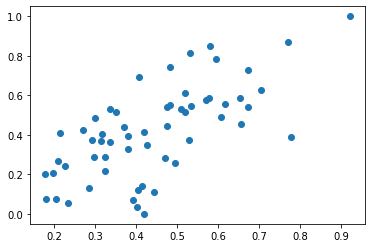

In [40]:
plt.scatter(recon[6,],ratings_np[6,])

## Color generalization

In [41]:
assoc_mat = np.array(pd.read_csv('../../data/uw_58_ratings_matrix.csv'))[:,1:]
assoc_mat = assoc_mat.astype('float')
assoc_mat = assoc_mat- c_means.V1.values
from numpy.linalg import inv, svd
U,S,Vh = svd(assoc_mat, full_matrices=False)
v_sub = Vh[0:8,]
conc_prof_mats= U @ np.diag(S)

In [42]:
# cors= []

# conc_prof_mat_C = np.zeros(shape = (30,8))

# ratings.loc[:, ratings.columns != 'V'+str(51)]
# for this_color in range(1,59):
#     for i in range(ratings.shape[0]):
#         column_name = 'V'+str(this_color)
#         ratings_sub = ratings.loc[:, ratings.columns != column_name]
#         ratings_sub = ratings_sub.iloc[:,1:]
#         concept_ratings = np.array(ratings_sub)-c_means[c_means.iloc[:,0]!=this_color].V1.values
#         A = pd.read_csv('../../data/basis_vecs_scaled_color_{}.csv'.format(this_color))
#         A = np.array(A)
#         A = np.delete(A, 0, axis=1)
#         A_8 = A[:,0:8]
        
#         reg = lm.LinearRegression().fit(A_8, concept_ratings.T)
#         coords = reg.coef_[0:8]
#         recon = np.matmul(A_8,coords)

    #cors.append(np.corrcoef(recon.astype(float),concept_ratings.squeeze(0).astype(float))[0,1])

    

In [43]:


conc_prof_mats = []
for this_color in range(1,59):
    conc_prof_mat_C = np.zeros(shape=(30,8))
    A = pd.read_csv('../../data/basis_vecs_scaled_color_{}.csv'.format(this_color))
    A = np.array(A)
    A = np.delete(A, 0, axis=1)
    A_8 = A[:,0:8]
    for i in range(ratings.shape[0]):
        
        column_name = 'V'+str(this_color)
       
        
        concept_ratings = ratings.loc[:,ratings.columns != column_name]
        concept_ratings = concept_ratings.iloc[i][1:]
        concept_ratings = np.array(concept_ratings)
        concept_ratings = concept_ratings-c_means[c_means.iloc[:,0]!=this_color].V1.values
        
        
        reg = lm.LinearRegression().fit(A_8, concept_ratings)
        coords = reg.coef_[0:8]
        recon = np.matmul(A_8,coords)
        conc_prof_mat_C[i,:] = coords
    #conc_prof_mats.append(conc_prof_mat_C)
    


In [44]:
color_coord_mat = pd.read_csv('../../data/uw58_regressor_vals.csv',header=None).to_numpy()
cors = []
for i in range(1,59):
    ratings_sub = ratings.iloc[:,1:]
    ratings_sub = ratings_sub.iloc[:,i-1]
    
    #this_conc_prof_mat = conc_prof_mats[i-1]
    this_conc_prof_mat = -pd.read_csv('../../data/left_8_vec_color_{}.csv'.format(i)).to_numpy()[:,1:]
    this_prof_coef_mat = pd.read_csv('../../data/8_regression_weights_color_{}.csv'.format(i), header=None).to_numpy()
    recon = np.matmul(np.matmul(this_conc_prof_mat,this_prof_coef_mat.T),color_coord_mat)+c_means.V1.values
    cors.append(np.corrcoef(recon[:,i-1],ratings_sub)[0,1])
    

In [45]:
colcors = pd.DataFrame(list(zip(list(range(1,59)),cors)), columns = ['color','holdout_correlation'])


In [99]:
colcors

,color,holdout_correlation,0,1,2
0,48,0.926530,0.402220,0.811940,0.361440
1,16,0.911752,0.802940,0.147350,0.779500
2,2,0.911175,0.110780,0.237980,0.380060
3,12,0.910582,0.179270,0.188350,0.526100
4,11,0.909691,0.028150,0.479950,0.800070
5,1,0.907307,0.302940,0.780570,0.909830
6,3,0.905211,0.366760,0.471510,0.631640
7,56,0.904582,0.451040,0.811540,0.061681
8,28,0.903708,0.368140,0.169010,0.228030
9,15,0.900096,0.647190,0.326470,0.785980


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


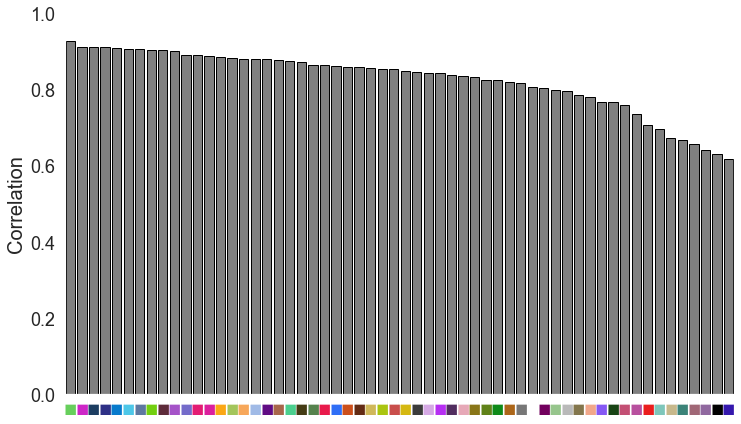

In [133]:
import matplotlib.font_manager as mfm

font_path = 'FreeSerif.ttf'
prop = mfm.FontProperties(fname=font_path)


colcors = colcors.sort_values(['holdout_correlation'],ascending=False).reset_index(drop=True)
fig = plt.figure(figsize=(12,7))
sns.barplot(colcors.index, colcors.holdout_correlation, edgecolor = 'black', color='gray')
#plt.axis('off')
#plt.xticks([])
#plt.xticks(rotation = 90, fontsize= 16)
plt.xlabel('')
plt.yticks(fontsize=18)
plt.ylabel('Correlation', fontsize=20)
plt.ylim(0,1)
ax = plt.gca()
#ax.set_facecolor((0.3497,0.3497,0.3497))
ax.set_facecolor((1,1,1))
symbolsx = [u"■"]*colcors.shape[0]
ax.set_xticks(range(len(symbolsx)))
ax.set_xticklabels(symbolsx, fontproperties=prop, fontsize=15)
for tick, color in zip(ax.get_xticklabels(), sns.color_palette(list(zip(colcors[0],colcors[1],colcors[2])))):
    tick.set_color(color)

plt.savefig('color_holdout.pdf',format ='pdf',bbox_inches='tight')
plt.show()


In [48]:
uw58rgb = pd.read_csv('../../data/UW_58_rgb.csv', header=None)

In [49]:
colcors = pd.concat([colcors, uw58rgb], axis=1)

In [50]:
colcors = colcors.sort_values(['holdout_correlation'],ascending=False).reset_index(drop=True)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


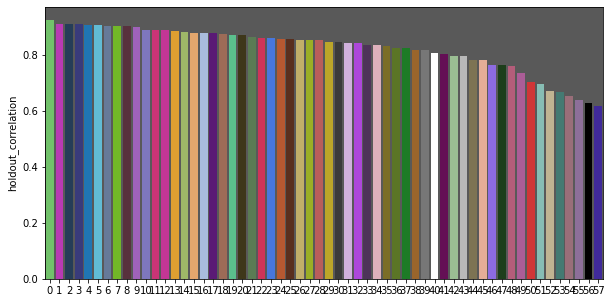

In [51]:
import seaborn as sns
plt.figure(figsize=(10,5))
colcors

ax = sns.barplot(colcors.index, colcors.holdout_correlation,  edgecolor = 'none',palette = sns.color_palette(list(zip(colcors[0],colcors[1],colcors[2]))))

ax.set_facecolor((0.3497,0.3497,0.3497))

In [52]:
column_name = 'V'+str(this_color)
ratings_sub = ratings.loc[:, ratings.columns != column_name]
A = pd.read_csv('../../data/basis_vecs_scaled_color_{}.csv'.format(this_color))
A = np.array(A)
A = np.delete(A, 0, axis=1)
A_8 = A[:,0:8]

In [53]:
v_sub_df = pd.DataFrame(v_sub.T, columns=['C1','C2','C3','C4','C5','C6','C7','C8'])
v_sub_df = pd.concat([v_sub_df, uw58rgb],axis=1)





In [54]:
assoc_mat

array([[-0.04285507,  0.01261907, -0.04107948, ..., -0.1684379 ,
         0.06401064, -0.20219735],
       [-0.11867579,  0.26094611,  0.03530624, ..., -0.21487715,
        -0.29557503, -0.30734959],
       [-0.03133925,  0.09939849,  0.00307287, ..., -0.31118805,
        -0.35317427, -0.33694301],
       ...,
       [-0.1479803 ,  0.46560017,  0.19275037, ..., -0.0692309 ,
         0.03429026, -0.17105767],
       [-0.25250249,  0.14235717, -0.03901189, ..., -0.26460905,
        -0.280962  , -0.28505689],
       [ 0.56061723, -0.08438392, -0.0114241 , ...,  0.53895669,
         0.41303309,  0.46355683]])

In [55]:
np.array(pd.read_csv('../../data/ratings_matrix.csv'))[:,0]

array(['dress', 'pants', 'shirt', 'shoes', 'socks', 'above', 'below',
       'beside', 'far', 'near', 'angry', 'disgust', 'fearful', 'happy',
       'sad', 'blueberry', 'lemon', 'mango', 'strawberry', 'watermelon',
       'beach', 'field', 'ocean', 'sky', 'sunset', 'dawn', 'day', 'dusk',
       'night', 'noon'], dtype=object)

In [56]:
U[0,0:8]

array([-0.00398518,  0.13291531, -0.04037276,  0.23156983, -0.0912974 ,
        0.28985467, -0.06628148,  0.13933505])

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


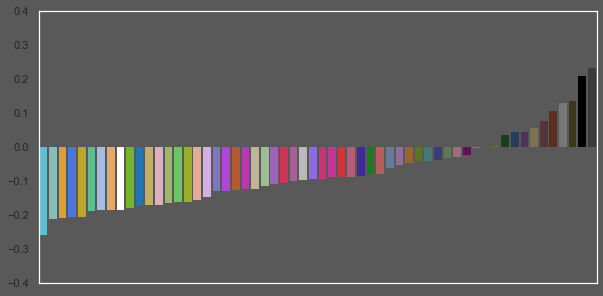

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


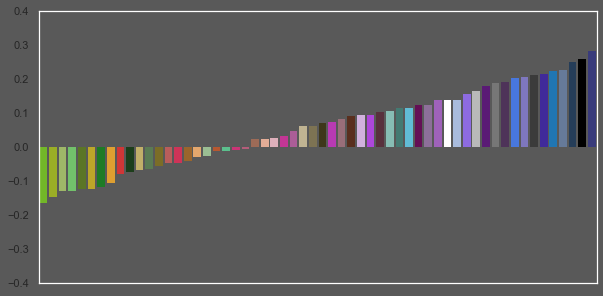

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


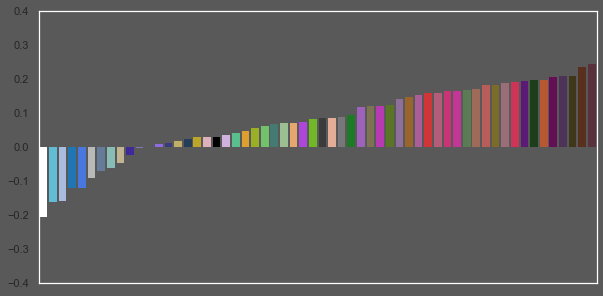

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


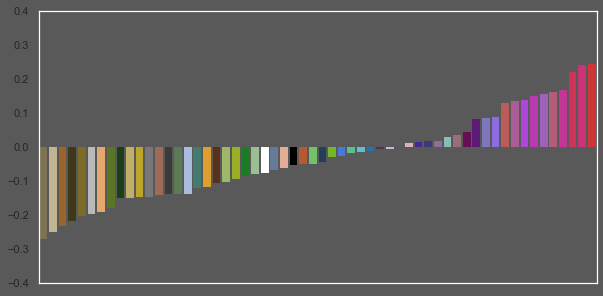

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


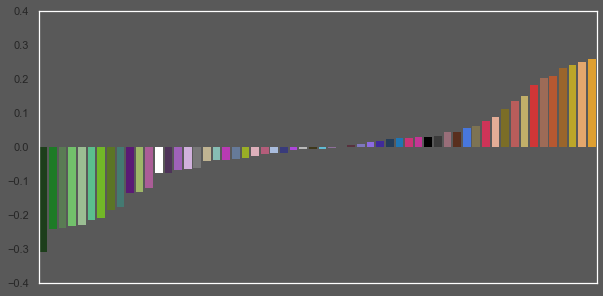

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


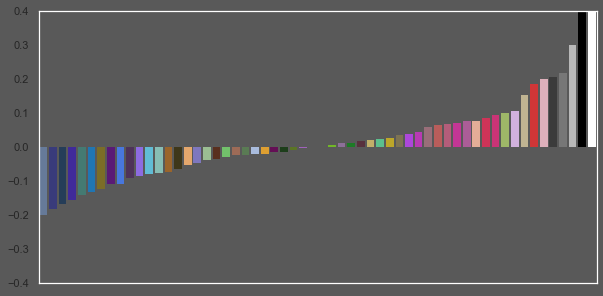

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


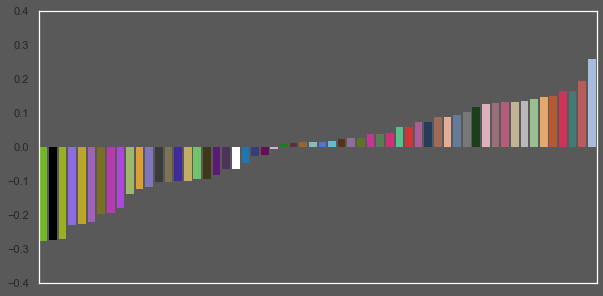

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


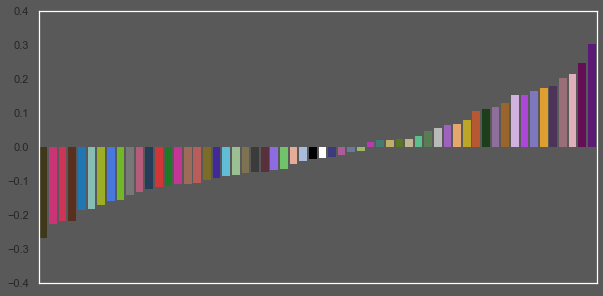

In [57]:
components = ['C1','C2','C3','C4','C5','C6','C7','C8']

for i in range(len(components)):
    sns.set(rc={'figure.facecolor':(0.3497,0.3497,0.3497),
               'axes.grid':False})
    plt.figure(figsize=(10,5))


    plotdf = v_sub_df.sort_values([str(components[i])]).reset_index(drop=True)
    fig = sns.barplot(plotdf.index, plotdf[components[i]], edgecolor = 'none',palette = sns.color_palette(list(zip(plotdf[0],plotdf[1],plotdf[2]))))
    #plt.axis('off')
    plt.xticks([])
    plt.ylabel('')
    plt.ylim(-0.4,0.4)
    ax = plt.gca()
    ax.set_facecolor((0.3497,0.3497,0.3497))
    
    plt.savefig('component_{}.pdf'.format(i))
    plt.show()
    

In [58]:
#Reconstructed ratings from matlab

In [59]:
reg_preds= pd.read_csv('../../data/regression_predictions.csv',header=None)
reg_preds = np.array(reg_preds)
reg_preds_df = pd.DataFrame(reg_preds.T, columns=['C1','C2','C3','C4','C5','C6','C7','C8'])
reg_preds_df = pd.concat([reg_preds_df, uw58rgb],axis=1)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


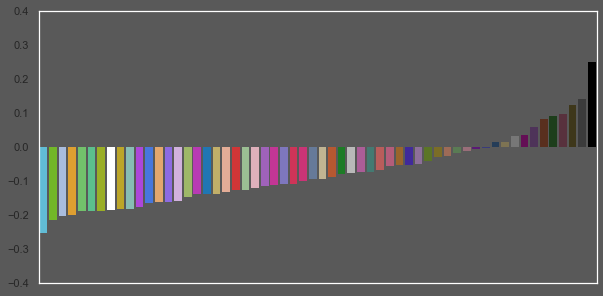

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


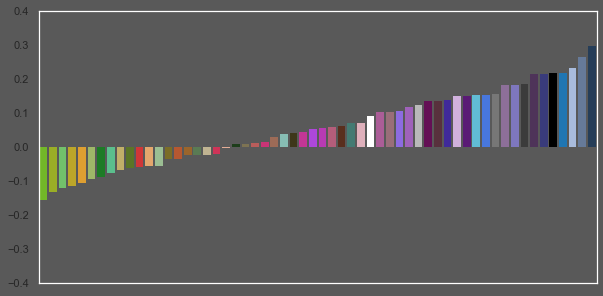

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


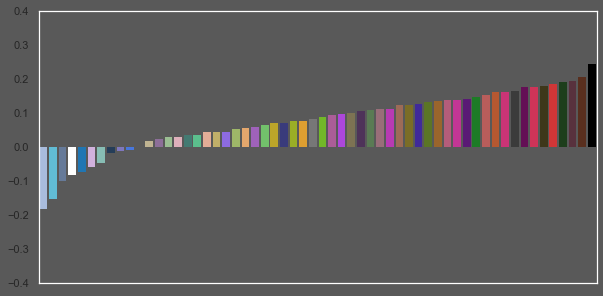

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


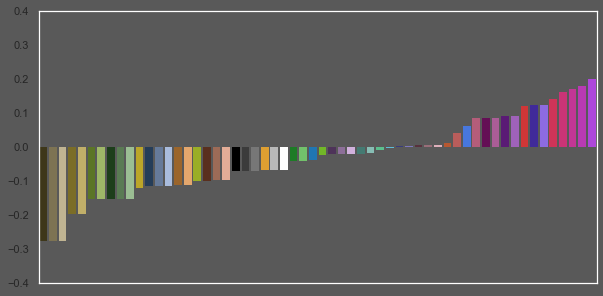

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


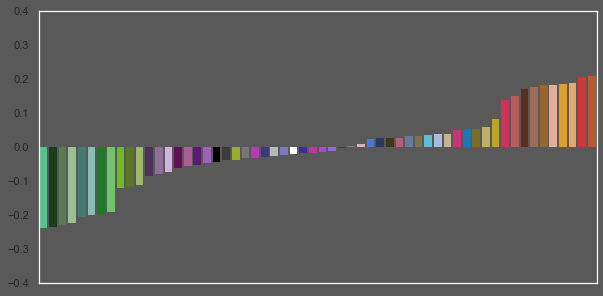

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


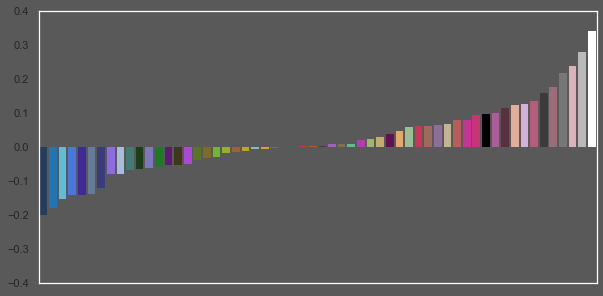

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


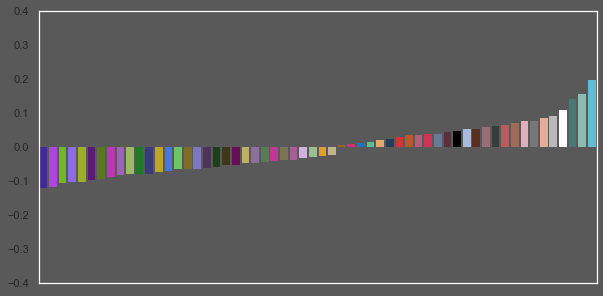

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


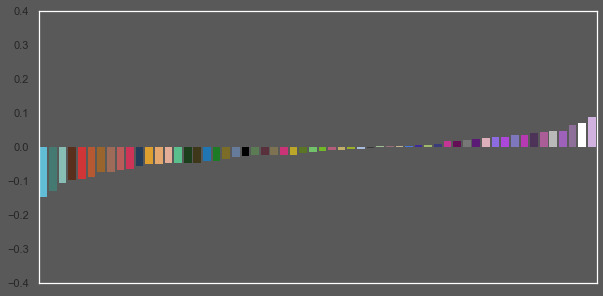

In [61]:


for i in range(len(components)):
    sns.set(rc={'figure.facecolor':(0.3497,0.3497,0.3497),
               'axes.grid':False})
    plt.figure(figsize=(10,5))


    plotdf = reg_preds_df.sort_values([str(components[i])]).reset_index(drop=True)
    fig = sns.barplot(plotdf.index, plotdf[components[i]], edgecolor = 'none',palette = sns.color_palette(list(zip(plotdf[0],plotdf[1],plotdf[2]))))
    #plt.axis('off')
    plt.xticks([])
    plt.ylabel('')
    plt.ylim(-0.4,0.4)
    ax = plt.gca()
    ax.set_facecolor((0.3497,0.3497,0.3497))
    
    plt.savefig('pred_component_{}.pdf'.format(i))
    plt.show()

In [62]:
color_reg_cors=[]
for i in range(8):
    color_reg_cors.append(np.corrcoef(v_sub[i,:],reg_preds[i,:])[0,1])
color_reg_cors

[0.9498272749485487,
 0.9344726910457715,
 0.8295989716550856,
 0.8974335928846019,
 0.8976055413007713,
 0.8294764966236317,
 0.5637997377599581,
 0.3738014133687678]

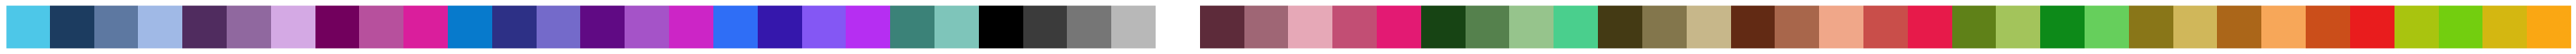

In [69]:
#fig = plt.figure()
sns.set(rc={'figure.facecolor':(1,1,1),
               'axes.grid':False})
fig = sns.palplot(uw58rgb.to_numpy())
#fig.get_figure()
#fig.savefig('uw58pal.pdf')

In [70]:
fig

In [ ]:
U_concepts = [ "dress"  ,    "pants" ,     "shirt"   ,   "shoes"  ,    "socks"   ,   "above"  ,    "below"   ,   "beside"  ,  
"far"     ,   "near"    ,   "angry"    ,  "disgust"  ,  "fearful" ,   "happy"   ,   "sad"  ,      "blueberry" ,
 "lemon"    ,  "mango"  ,    "strawberry" ,"watermelon" ,"beach"   ,   "field"   ,   "ocean"   ,   "sky" ,      
 "sunset"  ,   "dawn"  ,     "day"   ,     "dusk"  ,     "night"    ,  "noon"]       

In [ ]:
for i in range(U.shape[0]):
    print(U[i,0:8])

In [ ]:

    
U_ratings = U[:,0:8]

U_ratings = U_ratings - U_ratings.mean(axis=0)
U_ratings = U_ratings / np.abs(U_ratings).max(axis=0)



In [ ]:
U_ratings_df = pd.DataFrame(U_ratings)

In [ ]:
U_ratings_df['concept']= U_concepts

In [ ]:
from numpy import eye, asarray, dot, sum, diagx
def varimax(Phi, gamma = 1.0, q = 20, tol = 1e-6):
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in xrange(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d_old!=0 and d/d_old < 1 + tol: break
    return dot(Phi, R)

In [ ]:
sns.color_palette(list(zip(colcors[0],colcors[1],colcors[2])))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
fig = plt.figure(figsize=(7,5))
plt.rcParams.update({
    "figure.facecolor":  (1.0, 1.0, 1.0),  # red   with alpha = 30%
    "axes.edgecolor":     'black',
    "axes.facecolor":    (1, 1, 1),  # green with alpha = 50%
    "axes.spines.left":   True,
     "axes.spines.bottom": True
#axes.spines.top:    True
#axes.spines.right:  True"
})
mu = .1
variance = (1.4*(mu)*(1-mu))**2
sigma = math.sqrt(variance)
x = np.linspace(mu - 7*sigma, mu + 7*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color="#F0A78A", linewidth=3)
plt.xlim(0,1)
plt.xticks(fontsize=16)
plt.yticks([])
plt.xlabel("Association Rating", fontsize=18)
plt.ylabel("Density", fontsize=18)
plt.grid(False)
plt.show()